### Name: IFEANYI ANTHONY OKPALA
### Student Number: 202203449

Assignment – 771762 Big Data and Data Mining PROJECT


### Context 

The health of women throughout pregnancy, childbirth, and the postpartum period is referred to as maternal health. Despite significant advancement over the past 20 years, 295 000 women died during or after pregnancy and childbirth in 2017. This number is unacceptably high. In addition to indirect factors including anaemia, and malaria, the most frequent direct causes of maternal injury and death are excessive blood loss, infection, and high blood pressure. Most maternal deaths are preventable with timely management by skilled professionals working together across different disciplines.  

### Task
As a data scientist i am interested in analysing maternal health data, and identifying evidence based actions with an aim to improve health outcomes.

Before proceeding to the task at hand, we will have to install packages such as `mlxtend`, `scikit-learn` and `seaborn upgrade` as follows.  

In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable


### Next step after installation
It is good pactice to `Restart Kernel` after installing packages to ensure a stable and consistent environment.
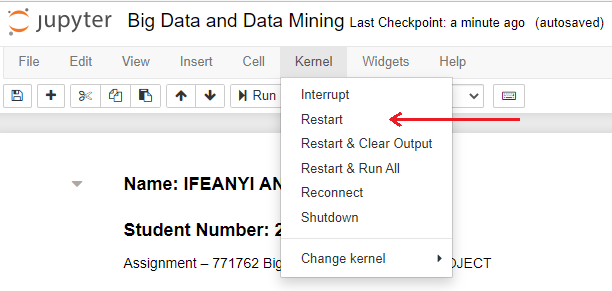

### Importing Packages from python library

In [4]:
# Lets import all the packages needed for this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

%matplotlib inline

### Task 1. Feature Selection and Linear Modelling
Build and fit a linear model, assuming that the response variable is Systolic BP, and the exploratory variable(s) of your choice. Explain why you chose these exploratory variables.

In [5]:
# Let's read our csv data into a pandas dataframe.

df = pd.read_csv("./mhs.csv") 
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
# Let's see a summarized information about our dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
# Let's investigate for duplicate values.

print(f"Total number of duplicates are: {len(df[df.duplicated() == True])}")


Total number of duplicates are: 562


We observed there were 562 identical rows, which was not dropped since there were no personal uniqueness in any of the features such as an identification number. 

In [8]:
# Let's look at the statistic for each of the columns.

df.describe().T    

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


Statistical Representation of Each of the Numerical Features in Our Maternal Health Dataset. This is a data cleaning process used to check for any incorrectness or anomaly in our dataset. We can point out few anomalies such as the minimum Heart Rate and Age in our data set which has a `value of 7 and 10`, respectively. In addition, Systolic BP and Age has a maximum `value of 160 and 70`, respectively, which can also be considered as irregular.


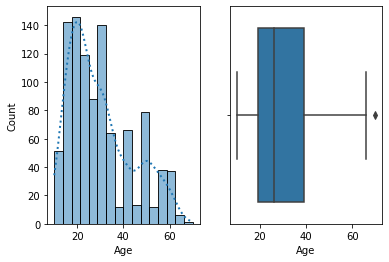

In [9]:
# Let's plot a histogram and a boxplot for the 'Age' column.

fig, ax =plt.subplots(1,2)
sns.histplot(data = df, x = 'Age',kde= True, line_kws={'color': 'green', 'lw': 2, 'ls': ':'}, ax=ax[0]) 
sns.boxplot(data = df, x = 'Age', ax=ax[1]) 

plt.show()


Most women over 45 are unable to get pregnant without the aid of IVF and other ART techniques. According to the American Society of Reproductive Medicine (ASRM), any woman, regardless of age, is capable of becoming pregnant with the aid of medical care as long as she has a "normal uterus," even if she no longer has ovaries or ovarian activity.

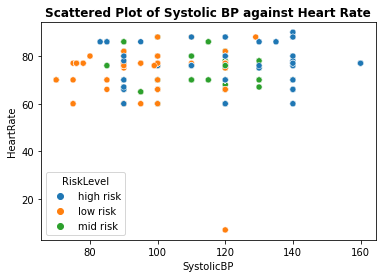

In [10]:
# Let's plot a scatterplot for the 'HeartRate' and 'SystolicBP' columns.

sns.scatterplot(data = df, x = 'SystolicBP', y = 'HeartRate', hue= 'RiskLevel') 
plt.title('Scattered Plot of Systolic BP against Heart Rate', fontweight='bold')

plt.show()

Visual Representation of the Systolic BP against Heart Rate. This is a scattered plot showing the relationship between Systolic BP and Heart Rate. We included the Risk Level feature as the hue for categorization, which gives us more insights on the data. We can detect few outliers, which has a Heart Rate below 20 and Systolic BP at 160. 

In [11]:
# Investigating heart rate Column.

df[df.HeartRate < 60 ]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


From the scatterplot and boxplot visualization shown above, outliers were detected in the `HeartRate` and `SystolicBP` columns. Hence, we will need to drop the row that shows an undefendable anormality which is the `HeartRate` of 7.

In [12]:
# Dropping heart rate below 20.

df.drop(df[df.HeartRate < 20].index, inplace=True)

df[df.HeartRate < 20 ]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [13]:
# Since we have only one categorical variable this can also be used ------> num_df = pd.get_dummies(df)

num_df = pd.get_dummies(df,prefix=['RiskLevel'], columns = ['RiskLevel'])

### Cleaned Data Visualization
To Confirm our cleaned data, we will be using a pairplot to visualize our feature data and ensure there are no anormalies.

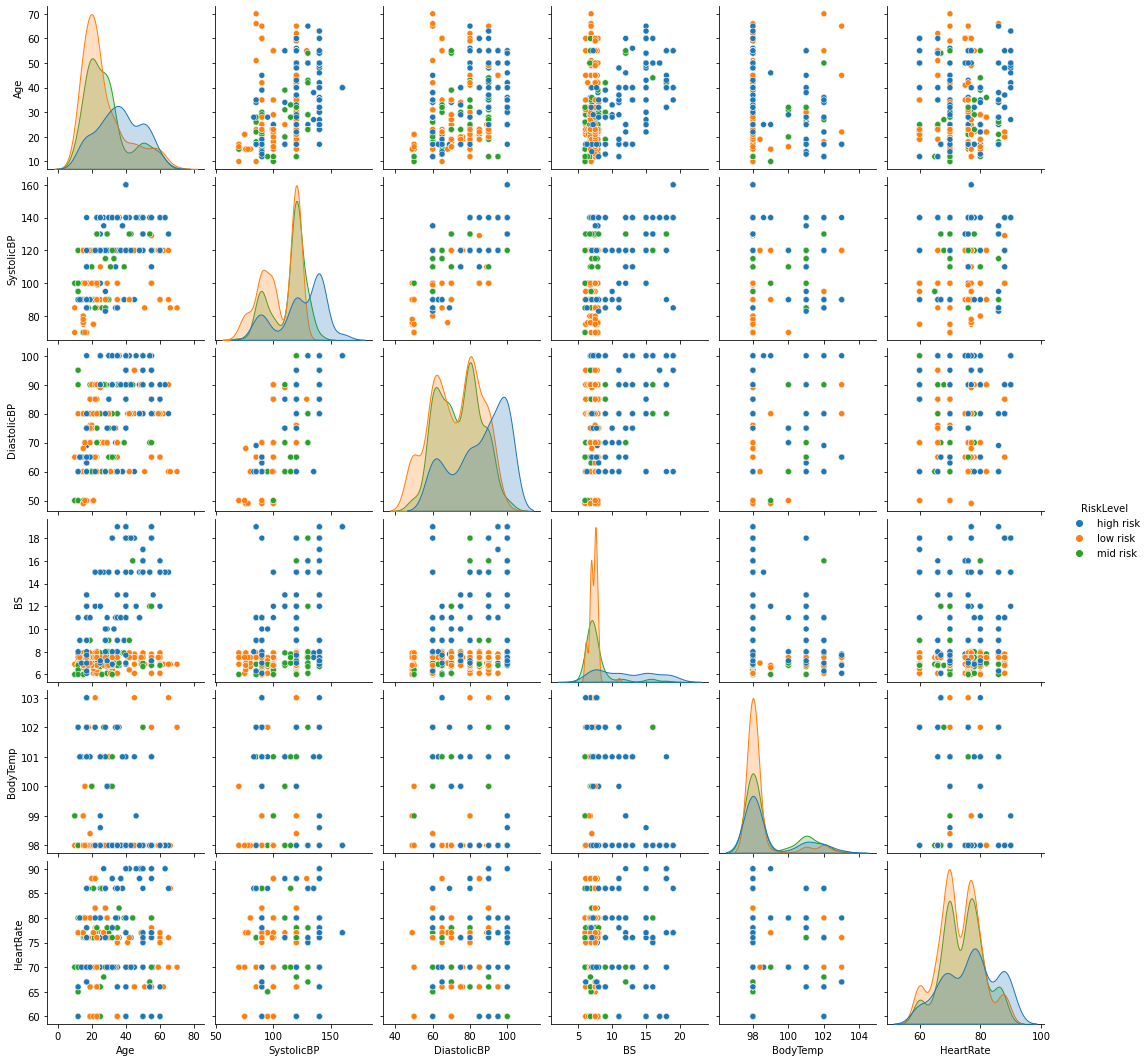

In [14]:
# We will first make use of a pairplot to see how each column relates to each other.

sns.pairplot(df, hue='RiskLevel')

Exploratory Data Analysis (EDA) Representation on Cleaned Data using Pair-Plot. This shows a visual relationship of the pair combination of our feature variables. In the case of anomalies, not much can be drawn except the case of the high risk systolic bp which was earlier discussed.

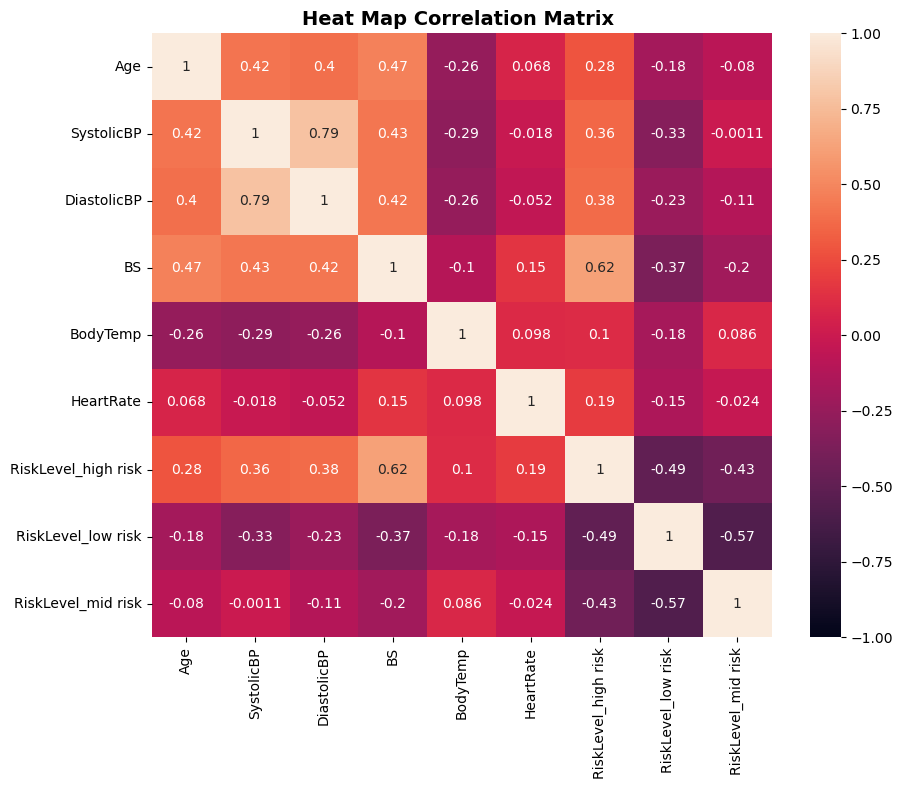

In [15]:
# Ploting heat map.

plt.figure(dpi=100,figsize=(10, 8))
sns.heatmap(num_df.corr(), annot = True, vmax=1, vmin=-1)
plt.title('Heat Map Correlation Matrix ', fontsize=14, fontweight='bold')
plt.show()

This shows the correlation between each of the feature variable. Considering absolute values, we can see that Diastolic BP, Age, Blood Sugar (BS), High Risk Level and Low Risk Level all has a decent correlation with the response variable.

### Linear Modelling

In [16]:
# Creating the train, test dataset, Let's split our dataset into train and test sets.
# 80% of the entire dataset will be used for training and 20% for testing.

X = num_df.drop('SystolicBP', axis = 1)
y = num_df['SystolicBP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 


In [17]:
# Scaling the dataset
"""
So if the data in any conditions has data points far from each other, 
scaling is a technique to make them closer to each other or in simpler words, 
we can say that the scaling is used for making data points generalized 
so that the distance between them will be lower.

"""

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

print(X_train.shape)
X_train.head()

(809, 8)


,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,0.166667,0.509804,0.077692,0.4,0.333333,0.0,0.0,1.0
1,0.666667,1.000000,0.769231,0.0,0.500000,1.0,0.0,0.0
2,0.133333,0.411765,0.053846,0.0,0.533333,0.0,1.0,0.0
3,0.150000,0.509804,0.146154,0.0,0.333333,0.0,1.0,0.0
4,0.300000,0.803922,0.069231,0.0,0.333333,0.0,1.0,0.0


In [18]:
# Multiple linear regression test report

def report_model_test(model, X_train, X_test):
    
    """
    Function for linear regression model and predictions.
    This takes in three arguments:
    
    The instance of the linear model,
    The proposed X_train and X_test
    
    """
    
    model.fit(X_train,y_train)
    basem_preds = model.predict(X_test) 
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    print(f"The result of the mean absolute error is: {mean_abs:.4f}")
    print(f"The result of the mean squared error is: {mean_squared:.4f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.4f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.4f}")
    
    return model
 
        

In [19]:
# Evaluation complete features on a linear model.

model = report_model_test(LinearRegression(), X_train, X_test) 
model

The result of the mean absolute error is: 8.7294
The result of the mean squared error is: 114.7395
The result of the root mean squared error is : 10.7117
The result of the coefficient of determination is: 0.6907


LinearRegression()


### SelectKBest Feature Selection Method

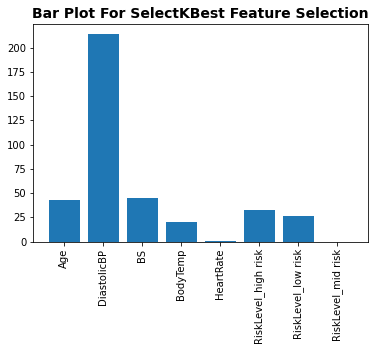

In [20]:
# Let's make use of SelectKBest.

predictors = num_df.columns.drop('SystolicBP')

# Perform the feature selection
selector = SelectKBest(f_regression, k="all")
selector.fit(num_df[predictors], num_df['SystolicBP'])
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('Bar Plot For SelectKBest Feature Selection', fontsize=14, fontweight='bold')
plt.show()


SelectKBest Feature Selection Representation using Bar Plot. This shows each feature importance to the response variable. This has an identical interpretation with the heatmap correlation matrix.

### Applying Feature Selection from our SelectKBest and Heat Map Correlation Matrix
We will use the best five features:

1) Age 

2) Diastolic BP

3) Blood Sugar

4) High Risk Level

5) Low Risk Level


In [21]:
# Feature selection

X_train_kbest = X_train[['Age', 'DiastolicBP', 'BS', 'RiskLevel_high risk', 'RiskLevel_low risk']]
X_test_kbest = X_test[['Age', 'DiastolicBP', 'BS', 'RiskLevel_high risk', 'RiskLevel_low risk' ]]

In [22]:
report_model_test(LinearRegression(), X_train_kbest, X_test_kbest)

The result of the mean absolute error is: 9.0784
The result of the mean squared error is: 123.3418
The result of the root mean squared error is : 11.1059
The result of the coefficient of determination is: 0.6675


LinearRegression()

### Forward Feature Selection Method

In [23]:
# Let's make use of Forward Feature Selection

from mlxtend.feature_selection import SequentialFeatureSelector  # <---- mlxtend was an installed package as shown above.

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

fs = SequentialFeatureSelector(estimator=model, k_features=X_train.shape[1], scoring=scorer, n_jobs=-1, verbose=2)

# Let's build our future selector 

fs.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   11.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   11.9s finished

[2023-05-12 05:25:02] Features: 1/8 -- score: -8.998459656432729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    2.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.1s finished

[2023-05-12 05:25:04] Features: 2/8 -- score: -8.638104405615142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-12 05:25:04] Features: 3/8 -- score: -8.440574014475093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(8, 8),
                          n_jobs=-1,
                          scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                          verbose=2)

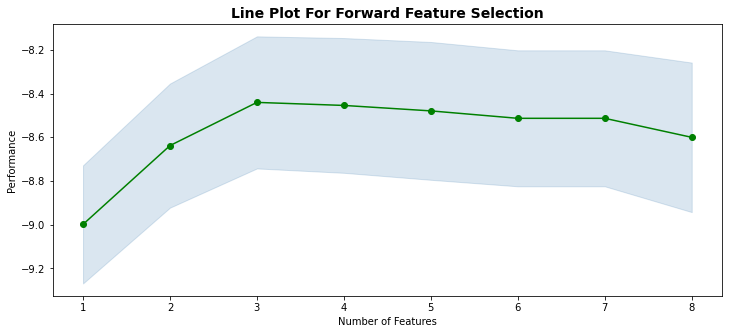

In [24]:
# importing the plotting function

from mlxtend.plotting import plot_sequential_feature_selection as plot_fs

# plotting the standard error 
fig1 = plot_fs(fs.get_metric_dict(),color='green', kind="std_err",marker='o', figsize = (12, 5))
plt.title(f'Line Plot For Forward Feature Selection', fontsize=14, fontweight='bold')
plt.xticks()
plt.show()


Forward Feature Selection Line Plot. This shows that 3 is the best number of feature combination that gives the optimal performance. The selected combinations were diastolic BP, body temperature and low risk level.

In [25]:
# Create an instance of the sequential feature selector

fs = SequentialFeatureSelector(estimator=model, k_features=3, n_jobs=-1, verbose=2)

# Build the sequential feature selector

fs.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-05-12 05:25:05] Features: 1/3 -- score: 0.6077141725954647[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-05-12 05:25:05] Features: 2/3 -- score: 0.6302823583574064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-12 05:25:05] Features: 3/3 -- score: 0.6424171905528796

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(3, 3),
                          n_jobs=-1, scoring='r2', verbose=2)

In [26]:
# Let's extract the index of selected values.

fs_index = fs.k_feature_idx_
fs_index

(1, 3, 6)

In [27]:
# Implimenting the selected features from forward feature selection.

X_train_fs = X_train[[X_train.columns[i] for i in fs_index]]
X_test_fs = X_test[[X_train.columns[i] for i in fs_index]]

In [28]:
# Evaluation of the features on a linear model.

report_model_test(LinearRegression(), X_train_fs, X_test_fs)

The result of the mean absolute error is: 8.5931
The result of the mean squared error is: 114.2391
The result of the root mean squared error is : 10.6883
The result of the coefficient of determination is: 0.6920


LinearRegression()

### Task 2. Principal Component Analysis (PCA)
Apply the principal component analysis (PCA) to reduce number of variables.


We will be using PCA for dimensionality reduction by transforming the original feature variables to a new set. PCA makes use of both eigenvectors and eigenvalues, The eigenvector with the largest eigenvalues corresponds to a larger variability in the data.

In [29]:
# Let's first select all the component and see the distribution of the variance.

pca_total = PCA(n_components=8, random_state=0)

pca_total_train = pca_total.fit_transform(X_train_scaled)
pca_total_test = pca_total.transform(X_test_scaled)

variance_ratio_total = pca_total.explained_variance_ratio_
vr =  [str(round(i*100,1))+"%" for i in variance_ratio_total]
vr_sum = [str(f"{round(variance_ratio_total.sum(),1)*100}%")]

bp_dict = dict(variance_ratio = vr_sum + vr,pca_no = ["sum"] + [f"PCA_{i+1}" for i in range(len(vr))])

bp_d = pd.DataFrame.from_dict(bp_dict).set_index('pca_no')

bp_d.T  

pca_no,sum,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
variance_ratio,100.0%,39.5%,32.9%,10.6%,6.3%,4.4%,3.8%,2.5%,0.0%


In [30]:
# from our insight above, let's instantiate PCA components of 3.

pca = PCA(n_components=3, random_state=0)

pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

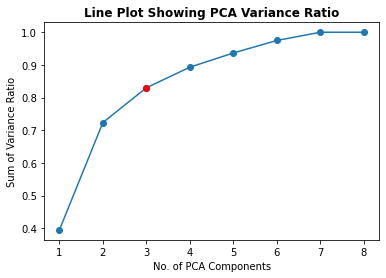

Utilized Data: 83.01%
Data lost: 16.99%


In [31]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

sum_ = []
count = 0
for i in variance_ratio_total:
    count += i
    sum_.append(count)
    
plt.plot([str(i+1) for i in range(len(variance_ratio_total))], sum_, marker='o')
plt.plot(len(variance_ratio)-1, sum_[len(variance_ratio)-1],color='red', marker='o')
plt.xlabel('No. of PCA Components')
plt.ylabel('Sum of Variance Ratio')

#plt.title(f'Line Plot Showing the Variance Ratio of {len(variance_ratio)} PCA Components', fontweight='bold')
plt.title(f'Line Plot Showing PCA Variance Ratio', fontweight='bold')
plt.show()

print(f"Utilized Data: {variance_ratio.sum()*100:.2f}%\nData lost: {(1-variance_ratio.sum())*100:.2f}%")

Line Plot Diagram of Variance Ratio with 3 PCA Components. This plot shows the relationship between the variance ratio and the number of PCA component. With a PCA of 3 components, our variance ratio is 83% with information loss of 17%

In [32]:
# Let's explore the correlation of the created features.

variable = X_train.columns

data = [(variable[i], *[np.corrcoef(X_train[variable[i]], pca_train[:, val])[1,0] 
        for val in range(pca.n_components_)]) 
        for i in range(len(variable))]

pd.DataFrame(data, columns=['Features']+[(f"PCA_{i+1}_Corr") for i in range(len(pca_train[0]))])

,Features,PCA_1_Corr,PCA_2_Corr,PCA_3_Corr
0,Age,-0.278260,0.300900,-0.523517
1,DiastolicBP,-0.311112,0.360152,-0.628879
2,BS,-0.463561,0.550511,-0.268514
3,BodyTemp,-0.164358,-0.031333,0.811418
4,HeartRate,-0.196186,0.165946,0.212071
5,RiskLevel_high risk,-0.532166,0.826080,0.130331
6,RiskLevel_low risk,0.993420,0.060717,-0.048889
7,RiskLevel_mid risk,-0.541577,-0.836827,-0.070833


In [33]:
# Evaluation of the features on a linear model.

report_model_test(LinearRegression(), pca_train, pca_test) 

The result of the mean absolute error is: 9.9431
The result of the mean squared error is: 150.5076
The result of the root mean squared error is : 12.2682
The result of the coefficient of determination is: 0.5942


LinearRegression()

### Task 3
Investigate the relationship between age and heartrate  by means of age grouping.
Provide graphical representation. (Hint: Calculate mean heartrate for each group)
Explain your choice of age intervals.

count    1012.000000
mean       29.899209
std        13.473560
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64

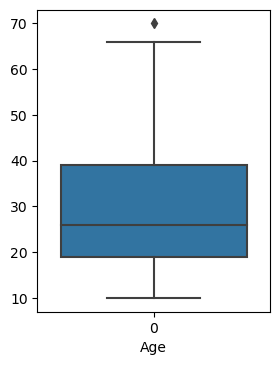

In [34]:
plt.figure(dpi=100,figsize=(3, 4))
sns.boxplot(data = df['Age'], orient='v')
plt.xlabel("Age")
df['Age'].describe()


The choice of age intervals or grouping is a crucial step, which should be based on the available data and the goals of the analysis. From the statistics and boxplot of the age, we can see that  the majority of the age falls within the ages of 19 to 35 years.

To find the relationship between Age and Heart Rate, we created a data frame consisting of both the age group and the mean of Heart Rate per grouping. The age grouping was done using a range of 5. This gives a more informative analysis on the demographic. 

In [35]:
# Let's create an 'Age Group' column.

def age_group(age):
    if age <= 14:
        return '10-14'
    elif age <= 19:
        return '15-19'
    elif age <= 24:
        return '20-24'
    elif age <= 29:
        return '25-29'
    elif age <= 34:
        return '30-34'
    elif age <= 39:
        return '35-39'
    elif age <= 44:
        return '40-44'
    elif age <= 49:
        return '45-49'
    elif age <= 54:
        return '50-54'
    elif age <= 59:
        return '55-59'
    elif age <= 64:
        return '60+'
    
df['AgeGroup'] = df['Age'].apply(age_group)    

In [36]:
df.describe(include=object)

,RiskLevel,AgeGroup
count,1012,1007
unique,3,11
top,low risk,15-19
freq,404,223


In [37]:
mean_HeartRate_by_age = df.groupby('AgeGroup')['HeartRate'].mean()
mean_HeartRate_by_age

AgeGroup
10-14    70.203704
15-19    73.587444
20-24    73.636872
25-29    77.937500
30-34    74.509091
35-39    73.803030
40-44    74.913043
45-49    82.288889
50-54    71.428571
55-59    74.000000
60+      72.513514
Name: HeartRate, dtype: float64

In [38]:
# Creating dataframe for the heartrate and age group feature.

heartrate_age_df = pd.DataFrame({"AgeGroup":mean_HeartRate_by_age.index, 
                                    "Mean_HeartRate":mean_HeartRate_by_age}
                                  ).reset_index(drop=True)
heartrate_age_df

,AgeGroup,Mean_HeartRate
0,10-14,70.203704
1,15-19,73.587444
2,20-24,73.636872
3,25-29,77.937500
4,30-34,74.509091
5,35-39,73.803030
6,40-44,74.913043
7,45-49,82.288889
8,50-54,71.428571
9,55-59,74.000000


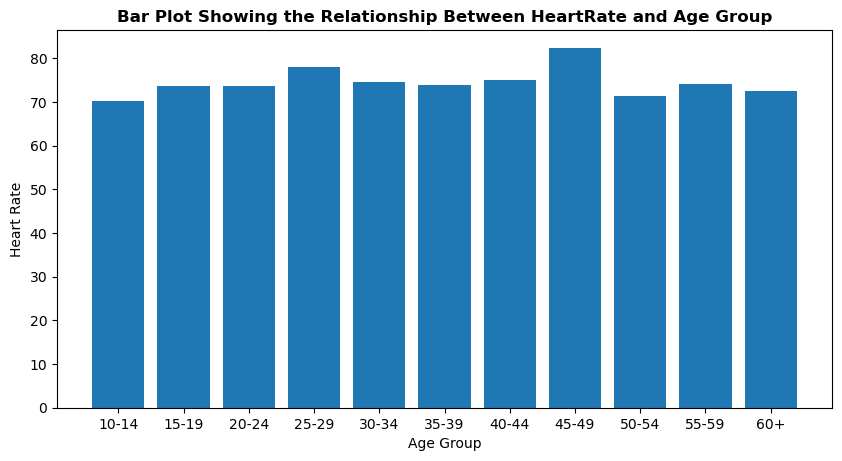

In [39]:
# Bar plot visualization.

plt.figure(dpi=100,figsize=(10, 5))
plt.bar(heartrate_age_df.AgeGroup, heartrate_age_df.Mean_HeartRate)
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.title('Bar Plot Showing the Relationship Between HeartRate and Age Group', fontweight='bold')
plt.show()

a)	Bar plot for age group against the mean heart rate, using an age group range of 5 with an interval of 10.

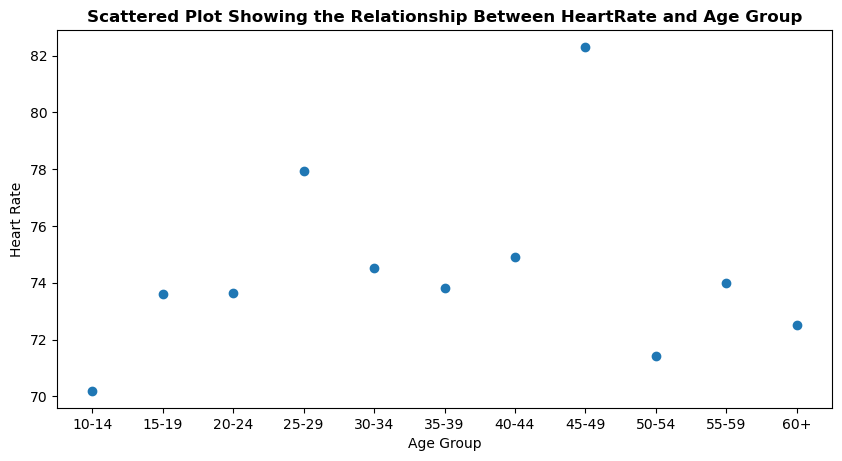

In [40]:
# Scattered plot visualization.

plt.figure(dpi=100,figsize=(10, 5))
plt.scatter(heartrate_age_df.AgeGroup, heartrate_age_df.Mean_HeartRate)
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.title('Scattered Plot Showing the Relationship Between HeartRate and Age Group', fontweight='bold')
plt.show()

b) Scattered plot for age group against mean heart rate, using an age group range of 5, with no linear correlation. 

### Task 4. Association Pattern Mining

Blood pressure is recorded with 2 numbers: the systolic blood pressure and diastolic blood pressure. Assume, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.

Describe how would you investigate associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.  
Calculate, and interpret the following:
(1)    Support
(2)    Confidence
(3)    Conviction
(4)    Lift

Hint:

High systolic and high diastolic (HS/HD): systolic >=140 and diastolic >= 90

Normal systolic and normal diastolic (NS/ND): 110 <= systolic < 140 and 70 <= diastolic < 90

Low systolic and low diastolic (LS/LD): systolic < 110 and diastolic < 70

In [41]:
def group_systolic(group):
    
    """
    Conditional function used to
    create systolic grouping.
    
    """
    if group >= 140:
        return 'High Systolic'
    elif group < 110:
        return 'Low Systolic'
    else:
        return 'Normal Systolic'
    
    
def group_diastolic(group):
    
    """
    Conditional function used to
    create diatolic grouping.
    
    """
    
    if group >= 90:
        return 'High Diastolic'
    elif group < 70:
        return 'Low Diastolic'
    else:
        return 'Normal Diastolic'
    
    
df['SystolicGroup'] = df['SystolicBP'].apply(group_systolic) 
df['DiastolicGroup'] = df['DiastolicBP'].apply(group_diastolic) 

df.describe(include=object)

,RiskLevel,AgeGroup,SystolicGroup,DiastolicGroup
count,1012,1007,1012,1012
unique,3,11,3,3
top,low risk,15-19,Normal Systolic,Normal Diastolic
freq,404,223,538,415


In [42]:
# Confirming added columns by calling the first five rows. 

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup,SystolicGroup,DiastolicGroup
0,25,130,80,15.0,98.0,86,high risk,25-29,Normal Systolic,Normal Diastolic
1,35,140,90,13.0,98.0,70,high risk,35-39,High Systolic,High Diastolic
2,29,90,70,8.0,100.0,80,high risk,25-29,Low Systolic,Normal Diastolic
3,30,140,85,7.0,98.0,70,high risk,30-34,High Systolic,Normal Diastolic
4,35,120,60,6.1,98.0,76,low risk,35-39,Normal Systolic,Low Diastolic


In [43]:
# Assigned variable names for high, normal and low for both Systolic and Diastolic BP.

sh = df.SystolicGroup == 'High Systolic'
sn = df.SystolicGroup == 'Normal Systolic'
sl = df.SystolicGroup == 'Low Systolic'

dh = df.DiastolicGroup == 'High Diastolic'
dn = df.DiastolicGroup == 'Normal Diastolic'
dl = df.DiastolicGroup == 'Low Diastolic'

### Creating functions for the support, confidence, conviction and lift association rules

In [44]:
sprt_list = []


def support(a,b,data):
    
    """
    A ⇒ B

    Support = Freq.(A and B)/Total

    """
    n = len(data[(a) & (b)])
    
    s = n/len(data)
    
    return s

sprt_list.append(support(dh,sh,df))
sprt_list.append(support(dn,sn,df))
sprt_list.append(support(dl,sl,df))

sprt_list.append(support(dh,sh,df))
sprt_list.append(support(dn,sn,df))
sprt_list.append(support(dl,sl,df))

print(sprt_list)

[0.11561264822134387, 0.3339920948616601, 0.26679841897233203, 0.11561264822134387, 0.3339920948616601, 0.26679841897233203]


In [45]:
conf_list = []

def confidence(a,b,data):
    
    """
    A ⇒ B
    
    Confidence = Freq.(A and B)/Freq.(A)

    """
    
    n = len(data[(a) & (b)])
    
    c = n/len(data[a])
    
    return c

conf_list.append(confidence(sh,dh,df))
conf_list.append(confidence(sn,dn,df))
conf_list.append(confidence(sl,dl,df))

conf_list.append(confidence(dh,sh,df))
conf_list.append(confidence(dn,sn,df))
conf_list.append(confidence(dl,sl,df))

print(conf_list)

[0.9, 0.6282527881040892, 0.7848837209302325, 0.42391304347826086, 0.8144578313253013, 0.8411214953271028]


In [46]:
conv_list = []

def conviction(a,b,data):
    
    """
    A ⇒ B

    Conviction = 1-Support(B)/1-conf(A ⇒B)

    """
    
    sb = len(data[b])/len(data)
    
    n = len(data[(a) & (b)])
    
    c = n/len(data[a])
    
    cv = (1-sb)/(1-c)
    
    return cv


conv_list.append(conviction(sh,dh,df))
conv_list.append(conviction(sn,dn,df))
conv_list.append(conviction(sl,dl,df))

conv_list.append(conviction(dh,sh,df))
conv_list.append(conviction(dn,sn,df))
conv_list.append(conviction(dl,sl,df))

print(conv_list)

[7.272727272727274, 1.5868873517786564, 3.174126695865825, 1.5128644939965694, 2.5243827318926138, 4.1546152057661]


In [47]:
lift_list = []

def lift(a,b,data):
    
    """
    A ⇒ B

    Lift = Support(A and B)/Support(A) x Support(B)

    """
    
    n = len(data[(a) & (b)])
    
    sn = n/len(data)
    
    sa = len(data[a])/len(data)
    
    sb = len(data[b])/len(data)
    
    l = sn/(sa*sb)
    
    return l
    
      
lift_list.append(lift(sh,dh,df))
lift_list.append(lift(sn,dn,df))
lift_list.append(lift(sl,dl,df))

lift_list.append(lift(dh,sh,df))
lift_list.append(lift(dn,sn,df))
lift_list.append(lift(dl,sl,df))

print(lift_list)

[3.3000000000000003, 1.5320284856899717, 2.4744620734622913, 3.3000000000000003, 1.5320284856899717, 2.4744620734622913]


APM,HS/HD,NS/ND,LS/LD,HD/HS,ND/NS,LD/LS
support,0.115613,0.333992,0.266798,0.115613,0.333992,0.266798
confidence,0.900000,0.628253,0.784884,0.423913,0.814458,0.841121
conviction,7.272727,1.586887,3.174127,1.512864,2.524383,4.154615
lift,3.300000,1.532028,2.474462,3.300000,1.532028,2.474462


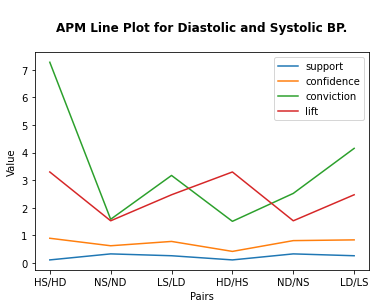

In [48]:
# Let's convert our result ot a dataframe.

bp_dict = dict(
    support = sprt_list,  confidence = conf_list,
    conviction = conv_list, lift = lift_list,
    APM = ['HS/HD','NS/ND','LS/LD', 'HD/HS','ND/NS','LD/LS'])


bp_df = pd.DataFrame.from_dict(bp_dict).set_index('APM') 


#plt.figure(figsize=(10, 8))

plt.title('\nAPM Line Plot for Diastolic and Systolic BP.\n', fontweight='bold')   
plt.ylabel ('Value') 
plt.xlabel ('Pairs')

for i in range(len(bp_dict)-1):
     
    sns.lineplot(bp_df,y = bp_df.columns[i], x = bp_df.index,label = bp_df.columns[i])     # <---- visualization of results

    
bp_df.T  




For Diastolic against Systolic, we can observe that the high paired BP had the lowest occurrence compared to other pairs, with a support value of approximately 12%. Observing the confidence value of the same pair, 42% of patients with high diastolic BP do not have high systolic BP. 
For the normal and low pairs, the support values are 33% and 27% respectively. This shows an occurrence of over one quarter percent of our dataset. The confidence value above 80%, informs a strong relationship between systolic and diastolic BP. 
Across all paired categories, the lift and conviction values were above one, which tells us there is a usefulness and dependency in each pair.


### Association Rules using the Apriori Method

In [49]:
df_SD = pd.DataFrame(df, columns =['SystolicGroup','DiastolicGroup'])

df_SD = pd.get_dummies(df_SD,prefix=['SystolicGroup','DiastolicGroup'], columns = ['SystolicGroup','DiastolicGroup'])

df_SD.head()

,SystolicGroup_High Systolic,SystolicGroup_Low Systolic,SystolicGroup_Normal Systolic,DiastolicGroup_High Diastolic,DiastolicGroup_Low Diastolic,DiastolicGroup_Normal Diastolic
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0


In [50]:
from mlxtend.frequent_patterns import apriori,association_rules 

freq_itemset = apriori(df_SD, min_support=0.1, use_colnames=True)
freq_itemset

C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128458,(SystolicGroup_High Systolic)
1,0.339921,(SystolicGroup_Low Systolic)
2,0.531621,(SystolicGroup_Normal Systolic)
3,0.272727,(DiastolicGroup_High Diastolic)
4,0.317194,(DiastolicGroup_Low Diastolic)
5,0.410079,(DiastolicGroup_Normal Diastolic)
6,0.115613,"(DiastolicGroup_High Diastolic, SystolicGroup_..."
7,0.266798,"(SystolicGroup_Low Systolic, DiastolicGroup_Lo..."
8,0.147233,"(SystolicGroup_Normal Systolic, DiastolicGroup..."
9,0.333992,"(SystolicGroup_Normal Systolic, DiastolicGroup..."


In [51]:
# Creating association_rules using the apriori method

rules = association_rules(freq_itemset,metric='confidence', min_threshold=0)
rules

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DiastolicGroup_High Diastolic),(SystolicGroup_High Systolic),0.272727,0.128458,0.115613,0.423913,3.300000,0.080579,1.512864,0.958333
1,(SystolicGroup_High Systolic),(DiastolicGroup_High Diastolic),0.128458,0.272727,0.115613,0.900000,3.300000,0.080579,7.272727,0.799698
2,(SystolicGroup_Low Systolic),(DiastolicGroup_Low Diastolic),0.339921,0.317194,0.266798,0.784884,2.474462,0.158978,3.174127,0.902728
3,(DiastolicGroup_Low Diastolic),(SystolicGroup_Low Systolic),0.317194,0.339921,0.266798,0.841121,2.474462,0.158978,4.154615,0.872680
4,(SystolicGroup_Normal Systolic),(DiastolicGroup_High Diastolic),0.531621,0.272727,0.147233,0.276952,1.015489,0.002246,1.005842,0.032566
5,(DiastolicGroup_High Diastolic),(SystolicGroup_Normal Systolic),0.272727,0.531621,0.147233,0.539855,1.015489,0.002246,1.017895,0.020973
6,(SystolicGroup_Normal Systolic),(DiastolicGroup_Normal Diastolic),0.531621,0.410079,0.333992,0.628253,1.532028,0.115986,1.586887,0.741430
7,(DiastolicGroup_Normal Diastolic),(SystolicGroup_Normal Systolic),0.410079,0.531621,0.333992,0.814458,1.532028,0.115986,2.524383,0.588673


### Task 5. Systolic BP Clustering
Find clusters of patients with similar Systolic BP.

In [52]:
target_y = df.SystolicBP.values.reshape(-1, 1)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\701316\AppData\Roaming\Python\Python39

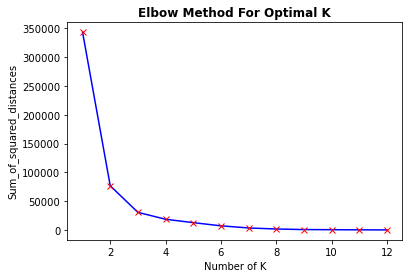

In [53]:
Sum_of_squared_distances = []

K = range(1,13)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(target_y)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'b-')
plt.plot(K, Sum_of_squared_distances, 'rx')
plt.xlabel('Number of K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K', fontweight='bold')
plt.show()

Elbow diagram Representing the number of clusters (K) against distance. Where K is 3, there is no significant change in distance.

In [54]:
# Let's use the Silhouette_score, Davies_bouldin_score methods.

from sklearn.metrics import silhouette_score, davies_bouldin_score

k_list = []
k = range(2,5)
for i in k:
    km = KMeans (n_clusters = i)
    cluster_labels = km.fit_predict(target_y)
    centers = km.cluster_centers_
    silh_value = silhouette_score(target_y, cluster_labels)
    db_index = davies_bouldin_score(target_y, cluster_labels)
    k_list.append((i, silh_value, db_index))



k_list_df = pd.DataFrame(k_list, columns = ['No. of K', 'silhouette_score', 'davies_bouldin_score']).set_index('No. of K')

k_list_df

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\701316\AppData\Roaming\Python\Python39

,silhouette_score,davies_bouldin_score
No. of K,,
2,0.758957,0.379113
3,0.801318,0.289553
4,0.793015,0.371666


Silhouette and Davies Bouldin Score. This shows the scores with cluster 2, 3 and 4. A higher Silhouette Score and lower Bouldin Score gives us the optimal cluster number.

In [55]:
# Implimenting a 3 centroid clustering.

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(target_y)

labels = kmeans.predict(target_y)

centroids = kmeans.cluster_centers_

print(f"The centroids are: {centroids}\n")
print(f"The labels are: {labels}")

The centroids are: [[137.80412371]
 [ 90.57848837]
 [119.51476793]]

The labels are: [0 0 1 ... 1 2 2]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\701316\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


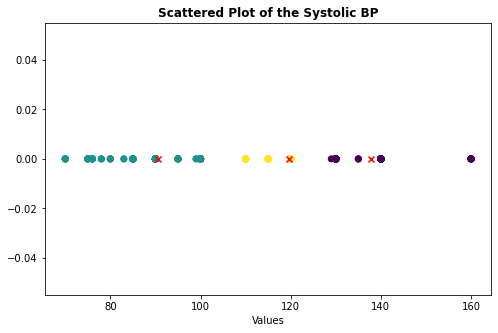

In [56]:
fig = plt.figure(figsize = (8, 5))
plt.scatter(target_y, np.zeros_like(target_y), c=kmeans.labels_)
plt.scatter(centroids, np.zeros(len(centroids)), marker='x', color='r')
plt.title('Scattered Plot of the Systolic BP', fontweight='bold')
plt.xlabel ('Values')
plt.show()

Scattered Plot Representing Clustering of Systolic BP. This shows both the centroid points and the clusters in different colours, with 3 being the number of clusters.

### Task 6. Correlation Between Age and Systolic BP
Calculate the correlation between age and systolic BP. Interpret your result.

In [57]:
# correlation between age and systolic BP

df[['Age','SystolicBP']].corr()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,SystolicBP
Age,1.000000,0.417292
SystolicBP,0.417292,1.000000


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


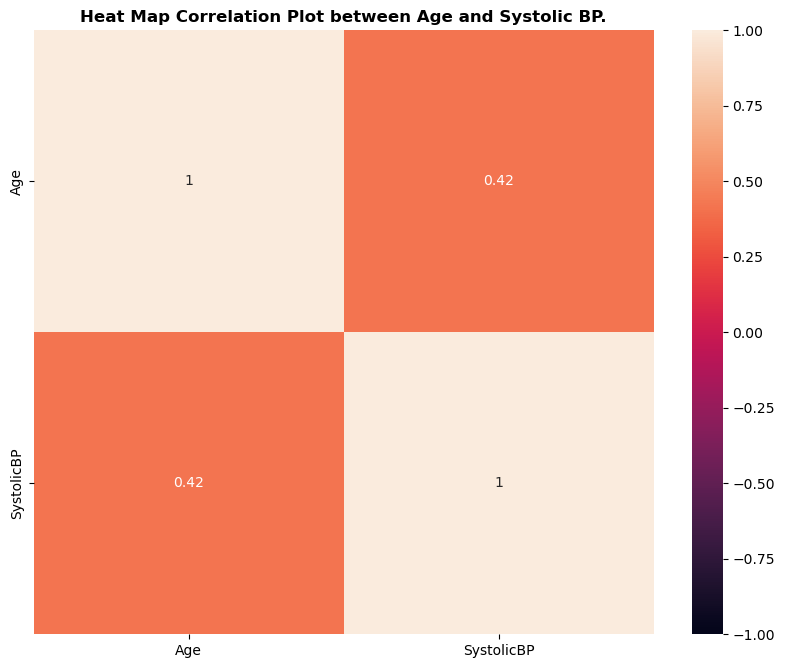

In [58]:
plt.figure(dpi=100,figsize=(10, 8))
sns.heatmap(df[['Age','SystolicBP']].corr(), annot = True, vmax=1, vmin=-1)
plt.title('Heat Map Correlation Plot between Age and Systolic BP.', fontweight='bold')
plt.show()

In [59]:
from scipy.stats.stats import pearsonr

corr, pvalue = pearsonr(df['Age'], df['SystolicBP'])

print(f"The pearson correlation coefficient is: {corr}\nThe p-value is: {pvalue}")

The pearson correlation coefficient is: 0.4172921436670314
The p-value is: 6.559904051447564e-44


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


From the Correlation Coefficient, there is a 42% relationship between the features. The P-value at 6.55× 10-44 shows strong evidence against the null hypothesis, interpreting that there is a linear relationship between both features, since the P-value is significantly lower than the standard threshold of 0.05.